# Setup

In [1]:
from PIL import Image
import glob
import os
import random
import matplotlib.pyplot as plt
import matplotlib. image as mpimg
import numpy as np

# Load Images and Masks and make some Example Plots
## Forest Segmentation

In [2]:
path_img = "data/Forest_Segmented/images"
path_mask = "data/Forest_Segmented/masks"
path_pred = "predictions"

In [3]:
pred_name = "pred_forest_202204291333_epoch=49_loss=0.310_dice=0.796_iou=0.718.npy"
preds = np.load(os.path.join(path_pred, pred_name))
mask_name = "mask_val_forest.npy"
masks = np.load(os.path.join(path_pred, mask_name))

In [4]:
preds.shape

(1022, 1, 64, 64)

In [5]:
masks = np.expand_dims(masks,axis=1)

In [6]:
masks.shape

(1022, 1, 256, 256)

In [7]:
preds[0].shape

(1, 64, 64)

[   0    1    2 ... 1019 1020 1021]
[484, 67, 859, 226, 899, 252, 17, 254]


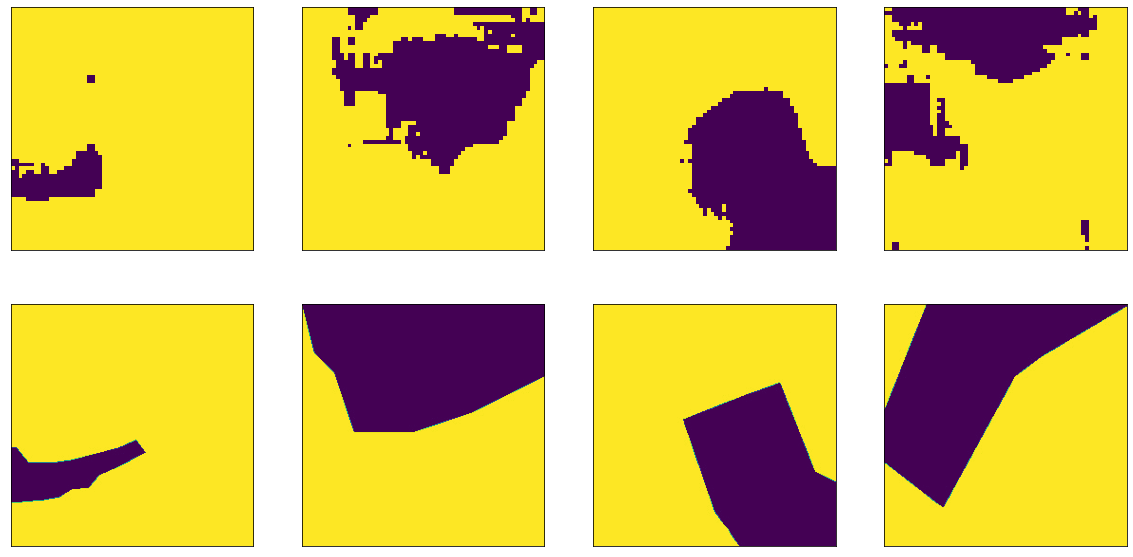

In [8]:
# select 20 random indices for the images
idxs_all = np.arange(preds.shape[0])
idxs_sel = random.choices(idxs_all, k=8)
fig, axes = plt.subplots(2, 4, figsize=(20,10))

print(idxs_all)
print(idxs_sel)

for i in range(4):
    img_pred = preds[idxs_sel[i]].swapaxes(0,2)
    img_pred = img_pred.swapaxes(0,1)
    img_true = masks[idxs_sel[i]].swapaxes(0,2)
    img_true = img_true.swapaxes(0,1)
    axes[0,i].imshow(img_pred)
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    
    axes[1,i].imshow(img_true)
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])

# Load Images and Masks and make some Example Plots
## City Segmentation

In [9]:
path_img = "data/Forest_Segmented/images"
path_mask = "data/CamSeq_2007/masks"
path_pred = "predictions"

In [10]:
pred_name = "pred_city_202204291439_epoch=49_loss=0.054_dice=0.751_iou=0.712.npy"
preds = np.load(os.path.join(path_pred, pred_name))
mask_name = "mask_val_city.npy"
masks = np.load(os.path.join(path_pred, mask_name))

In [11]:
preds.shape

(21, 23, 64, 64)

In [22]:
print(preds[0].shape)
print(preds[0].swapaxes(0,2).shape)
print(preds[0].swapaxes(0,2).swapaxes(0,1).shape)

(23, 64, 64)
(64, 64, 23)
(64, 64, 23)


In [13]:
masks.shape

(21, 64, 64, 23)

In [14]:
masks[0].shape

(64, 64, 23)

In [40]:
classes = [
    'Animal',
    'Archway',
    'Bicyclist',
    'Building',
    'Car',
    'CartLuggagePram',
    'Child', 
    'Column_Pole',
    'Fence',
    'LaneMkgsDriv',
    'Misc_Text',
    'OtherMoving',
    'Pedestrian',
    'Road',
    'Sidewalk',
    'SignSymbol',
    'Sky',
    'TrafficLight',
    'Tree',
    'Truck_Bus',
    'VegetationMisc',
    'Void',
    'Wall'
]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[11, 16, 13, 8, 14, 1, 19, 11]
class: 11, OtherMoving
class: 11, OtherMoving
class: 11, OtherMoving
class: 11, OtherMoving


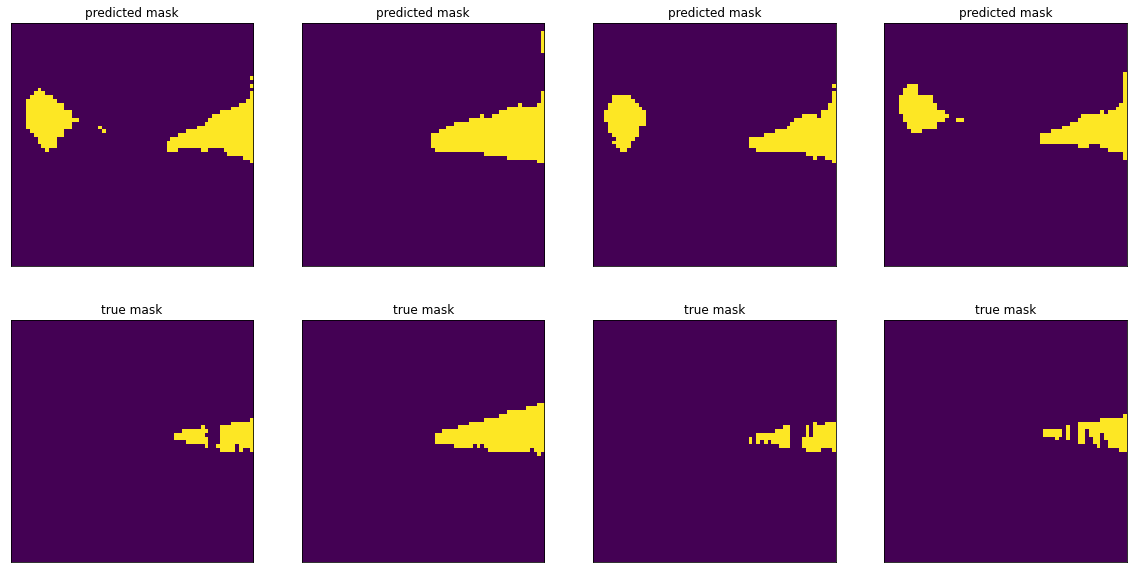

In [48]:
# select 20 random indices for the images
# select random class index
idxs_all = np.arange(preds.shape[0])
idxs_sel = random.choices(idxs_all, k=8)
fig, axes = plt.subplots(2, 4, figsize=(20,10))

class_idx = np.arange(23)
idx_class = random.choices(class_idx, k=1)[0]

print(idxs_all)
print(idxs_sel)

for i in range(4):
    print(f"class: {idx_class}, {classes[idx_class]}")
    img_pred = preds[idxs_sel[i]][:,:,:]
    img_pred = img_pred.swapaxes(0,2)
    img_pred = img_pred.swapaxes(0,1)[:,:,idx_class]
    img_true = masks[idxs_sel[i]][:,:,idx_class]
    axes[0,i].imshow(img_pred)
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    axes[0,i].set_title("predicted mask")
    
    axes[1,i].imshow(img_true)
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])
    axes[1,i].set_title("true mask")